In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale

In [2]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
outcome = df['Outcome']

df = df.drop('Outcome',axis = 1)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<AxesSubplot:>

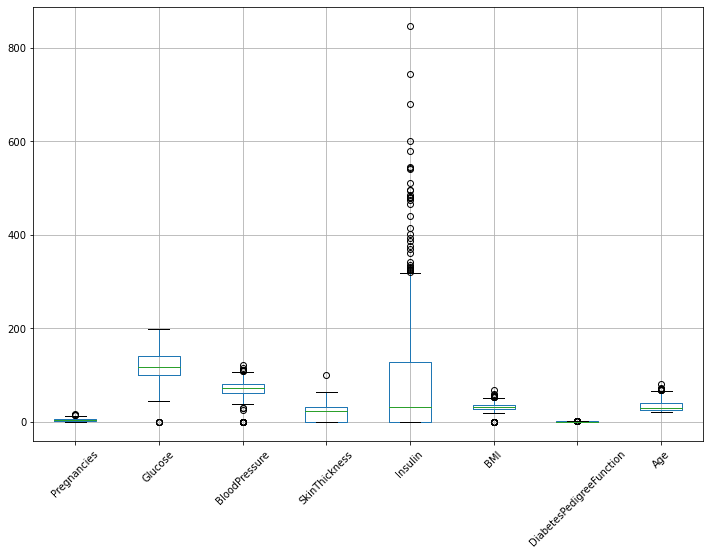

In [7]:
df.boxplot(figsize = (12, 8), rot =45)

<AxesSubplot:>

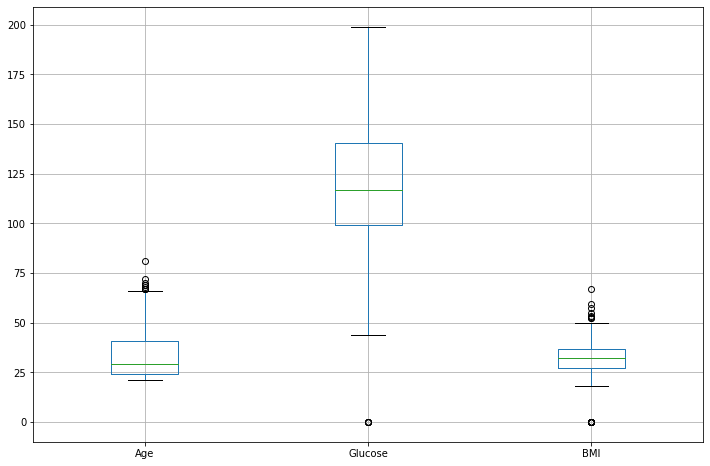

In [8]:
df.boxplot(column =['Age', 'Glucose', 'BMI'], figsize = (12,8))

In [9]:
manually_scaled_df = pd.DataFrame()

In [12]:
manually_scaled_df['Age'] = (df['Age'] - np.mean(df['Age'].values)) / np.std(df['Age'].values)

manually_scaled_df['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values)) / np.std(df['Glucose'].values)

manually_scaled_df['BMI'] = (df['BMI'] - np.mean(df['BMI'].values)) / np.std(df['BMI'].values)

In [14]:
manually_scaled_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.931325e-16,-9.251859e-18,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


<AxesSubplot:>

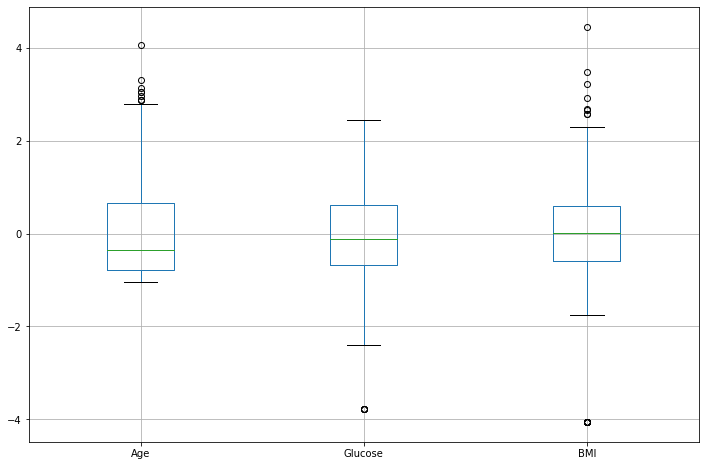

In [16]:
manually_scaled_df.boxplot(column =['Age', 'Glucose', 'BMI'], figsize = (12,8))

In [17]:
scale_df = pd.DataFrame()

In [18]:
scale_df['Age'] = scale(df['Age'])
scale_df['Glucose'] = scale(df['Glucose'])
scale_df['BMI'] = scale(df['BMI'])

In [20]:
scale_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.931325e-16,-9.251859e-18,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


In [21]:
std_scaler = StandardScaler(copy = True, with_mean = True, with_std = True)

In [22]:
scaled_array= std_scaler.fit_transform(df)

<AxesSubplot:>

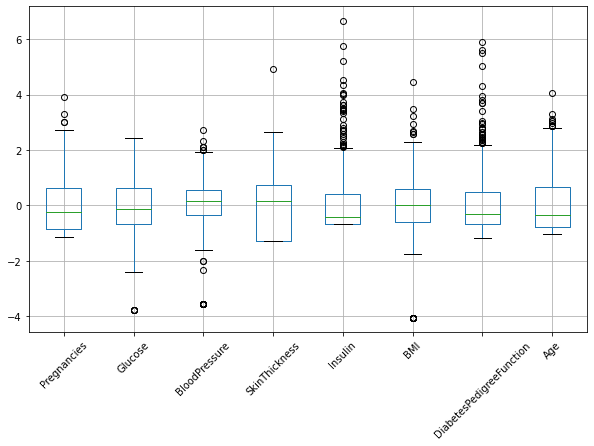

In [23]:
scaled_df = pd.DataFrame(scaled_array, columns = df.columns)

scaled_df.boxplot(figsize= (10, 6) ,rot = 45)

In [25]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [26]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [27]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [28]:
std_scaler.n_samples_seen_

768

In [29]:
scaled_df['Outcome'] = outcome

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [31]:
scaled_df.to_csv('dataset/diabetes_processed.csv',index = False)